In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
from matplotlib import rcParams

rcParams['font.size'] = 6

import json
from numpy import mean, std

# Feature Selection Trials

### Load in data


In [7]:
mdl_fs_data = {
    'linear': {},
    'lasso': {},
    'forest': {},
    'svr': {}
}

for mdl in ['linear', 'lasso', 'forest', 'svr']:
    for fs in ['all', 'fs', 'min']:
        with open('{}_{}_results.json'.format(mdl, fs), 'r') as j:
            mdl_fs_data[mdl][fs] = json.load(j)

In [57]:
def fs_comparison_plot(mdl, metric, ylab, ylim):
    
    fig = plt.figure(figsize=(0.875, 1.5))
    ax = fig.add_subplot(111)
    
    fs_data = mdl_fs_data[mdl]
    
    bwidth = 0.4
    xtrain = [_ - bwidth / 2 for _ in range(1, 4)]
    xtest = [_ + bwidth / 2 for _ in range(1, 4)]
    ekw = {
        'elinewidth': 1
    }
    
    ytrain = [mean([a['train'][metric] for a in fs_data[_]]) for _ in fs_data]
    ytrain_err = [std([a['train'][metric] for a in fs_data[_]]) for _ in fs_data]
    ytest = [mean([a['test'][metric] for a in fs_data[_]]) for _ in fs_data]
    ytest_err = [std([a['test'][metric] for a in fs_data[_]]) for _ in fs_data]
    
    ax.bar(xtrain, ytrain, yerr=ytrain_err, color='b', width=bwidth, error_kw=ekw)
    ax.bar(xtest, ytest, yerr=ytest_err, color='r', width=bwidth, error_kw=ekw)
    
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['all', 'auto', 'manual'], rotation=90)
    
    ax.set_ylim(ylim)
    ax.set_title(mdl)
    
    for d in ['top', 'right']:
        ax.spines[d].set_visible(False)
    ax.set_ylabel(ylab)
    
    #plt.tight_layout()
    plt.savefig('{}_{}_featsummary.png'.format(mdl, metric), dpi=300, bbox_inches='tight')
    
    plt.show()

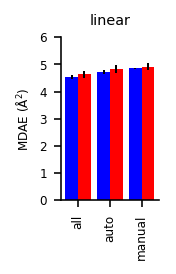

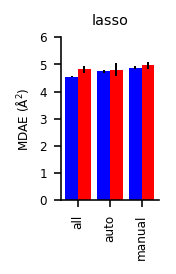

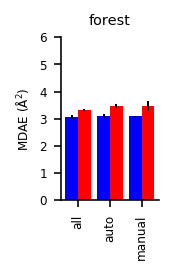

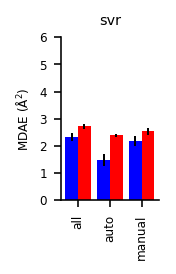

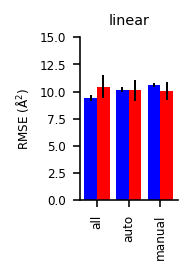

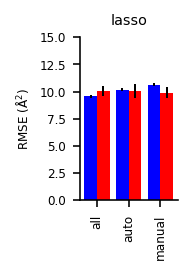

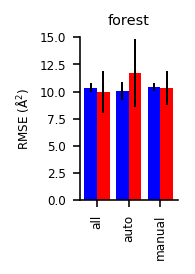

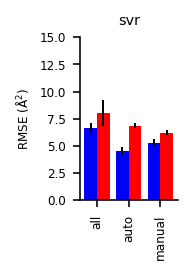

In [58]:
fs_comparison_plot('linear', 'MDAE', r'MDAE (Å$^2$)', [0, 6])
fs_comparison_plot('lasso', 'MDAE', r'MDAE (Å$^2$)', [0, 6])
fs_comparison_plot('forest', 'MDAE', r'MDAE (Å$^2$)', [0, 6])
fs_comparison_plot('svr', 'MDAE', r'MDAE (Å$^2$)', [0, 6])
fs_comparison_plot('linear', 'RMSE', r'RMSE (Å$^2$)', [0, 15])
fs_comparison_plot('lasso', 'RMSE', r'RMSE (Å$^2$)', [0, 15])
fs_comparison_plot('forest', 'RMSE', r'RMSE (Å$^2$)', [0, 15])
fs_comparison_plot('svr', 'RMSE', r'RMSE (Å$^2$)', [0, 15])

# K-Means Clustering and Multiple Estimators

In [1]:
def kmc_comparison_plot_MDAE_RMSE(mdl):
    
    fig = plt.figure(figsize=(1.11, 1.75))
    ax = fig.add_subplot(111)
    
    fs_data = mdl_fs_data[mdl]['all']

    kmc_data = kmc_mdl_data[mdl]
    
    bwidth = 0.2
    xtrain = [1 - bwidth * 1.5, 2 - bwidth * 1.5]
    xtrain2 = [1 + bwidth / 2, 2 + bwidth / 2]
    xtest = [1 - bwidth / 2, 2 - bwidth / 2]
    xtest2 = [1 + bwidth * 1.5, 2 + bwidth * 1.5]
    ekw = {
        'elinewidth': 0.75
    }
    
    ytrain = [mean([_['train'][metric] for _ in fs_data]) for metric in ['MDAE', 'RMSE']]
    ytrain2 = [mean([_['train'][metric] for _ in kmc_data]) for metric in ['MDAE', 'RMSE']]
    ytrain_err = [std([_['train'][metric] for _ in fs_data]) for metric in ['MDAE', 'RMSE']]
    ytrain_err2 = [std([_['train'][metric] for _ in kmc_data]) for metric in ['MDAE', 'RMSE']]
    
    ytest = [mean([_['train'][metric] for _ in fs_data]) for metric in ['MDAE', 'RMSE']]
    ytest2 = [mean([_['train'][metric] for _ in kmc_data]) for metric in ['MDAE', 'RMSE']]
    ytest_err = [std([_['test'][metric] for _ in fs_data]) for metric in ['MDAE', 'RMSE']]
    ytest_err2 = [std([_['test'][metric] for _ in kmc_data]) for metric in ['MDAE', 'RMSE']]
    
    ax.bar(xtrain, ytrain, yerr=ytrain_err, color='b', width=bwidth, error_kw=ekw)
    ax.bar(xtrain2, ytrain2, yerr=ytrain_err2, color='purple', width=bwidth, error_kw=ekw)
    ax.bar(xtest, ytest, yerr=ytest_err, color='r', width=bwidth, error_kw=ekw)
    ax.bar(xtest2, ytest2, yerr=ytest_err2, color='#ffa600', width=bwidth, error_kw=ekw)
    
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['MDAE', 'RMSE'], rotation=45)
    
    ax.set_ylim([0, 12.5])
    ax.set_title(mdl)
    
    for d in ['top', 'right']:
        ax.spines[d].set_visible(False)
    ax.set_ylabel(r'Å$^2$')
    
    #plt.tight_layout()
    plt.savefig('kmc_{}_perfcomp.png'.format(mdl), dpi=300, bbox_inches='tight')
    
    plt.show()

In [3]:
import json
kmc_mdl_data = {}
for mdl in ['lasso', 'forest', 'svr']:
    with open('kmcm_{}_results.json'.format(mdl), 'r') as j:
        kmc_mdl_data[mdl] = json.load(j)

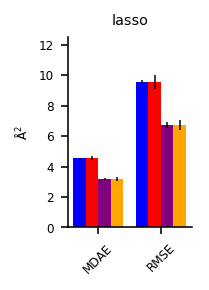

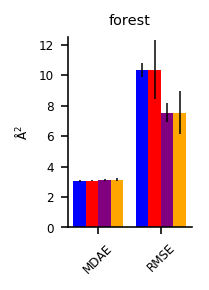

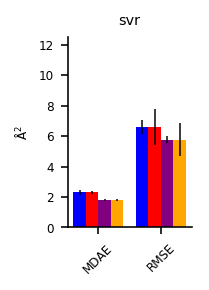

In [10]:
kmc_comparison_plot_MDAE_RMSE('lasso')
kmc_comparison_plot_MDAE_RMSE('forest')
kmc_comparison_plot_MDAE_RMSE('svr')